In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
#import obspy
import glob
import random
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import pickle
f1 = open('data1.pckl', 'rb')
f0 = open('data0.pckl', 'rb')
data1 = pickle.load(f1)
data0 = pickle.load(f0)
f1.close()
f0.close()

In [4]:
print(shape(data1))
print(shape(data0))
train_data = np.concatenate((data1[0:140 * 9], data0[0:20000]), axis=0)
test_data  = np.concatenate((data1[140 * 9:], data0[20000:]), axis = 0)

(1728, 151)
(26343, 151)


In [5]:
def Eval(label1, trueLabel):
    truePos = sum((label1 == 1) * (trueLabel == 1))
    trueNeg = sum((label1 == 0) * (trueLabel == 0))
    falsePos = sum((label1 == 1) * (trueLabel == 0))
    falseNeg = sum((label1 == 0) * (trueLabel == 1))
    #print truePos, trueNeg, falsePos, falseNeg
    type1 = 1. * falsePos / (falsePos + truePos)
    type2 = 1. * falseNeg / (falseNeg + trueNeg)
    recall = 1. * truePos / (truePos + falseNeg)
    precision = 1. * truePos / (truePos + falsePos)
    return(type1, type2, recall, precision)

In [6]:
# sklearn
from sklearn.svm import SVC
#svc = SVC(kernel='poly', degree=4, coef0=0)
svc = SVC(kernel='poly', degree=4, coef0=0, C=10)
#svc = SVC(kernel='linear', degree=2, coef0=0, C=10)

svc.fit(train_data[:,:150], train_data[:,150])
#print(svc.n_support_)
#svc.score(data[:,:150], data[:,150])
#weight = svc.coef_
#plt.plot(weight[0,:])
#plt.figure()
#label1 = svc.predict(test_data[:,:150])


SVC(C=10, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape=None, degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm1 = svc.predict(data1[:, 0:150])
svm0 = svc.predict(data0[:, 0:150])
import pickle
f1 = open('svm1.pckl', 'wb')
f0 = open('svm0.pckl', 'wb')
pickle.dump(svm1, f1)
pickle.dump(svm0, f0)
f1.close()
f0.close()

In [ ]:
import pickle
f1 = open('svm1.pckl', 'rb')
f0 = open('svm0.pckl', 'rb')
svm11 = pickle.load(f1)
svm0 = pickle.load(f0)
f1.close()
f0.close()

In [9]:
label2 = svc.predict(test_data[:,:150])
trueLabel = test_data[:,150]
#plt.scatter(range(len(label2)), label2 == testdata[:, 150])
print(np.where(label2 != test_data[:, 150]))
print(sum((label2 == 0)*(test_data[:, 150] == 1)))
#print(Eval(label1, trueLabel))
print(Eval(label2, test_data[:, 150]))


(array([   9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
         20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,
         31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   49,   50,   51,   52,
         53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,
         64,   65,   66,   67,   68,   69,   70,   71,   72,   73,   74,
         75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
         86,   87,   88,   89,   90,   91,   92,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  105,  106,  107,
        108,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,
        119,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  143,  171,  180,  189,  190,  191,  192,  193,  194,
        195,  196,  197,  251,  297,  298,  299,  

../../data/Human/013306004148017_1419671813.json


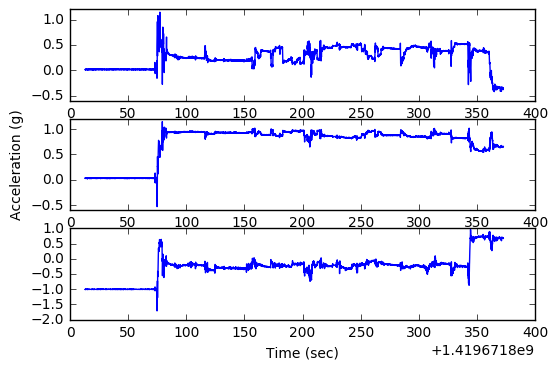

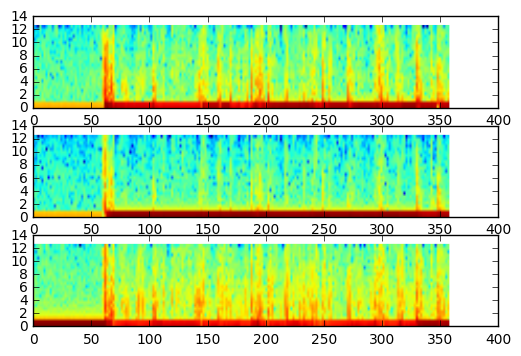

[  11.92132568   12.04133916   22.44249582   58.20647311   58.2864821
   58.32648659   58.36649084   58.40649533   58.44649982   58.48650432
   58.52650881   58.5665133    58.60651755   58.76653552   58.80653977
   58.84654427   58.88654876   75.28837276   75.32837725   75.36838174
   75.44839072   75.48839498   75.52839947   75.56840396   75.60840845
   75.64841294   75.68841743   75.72842169   75.76842618   75.80843067
   75.84843516   75.88843966   75.92844391   75.9684484    76.00845289
  123.73376036  127.81421423  127.85421872  127.89422321  137.13525081
  141.65575361  141.6957581   141.73576236  141.77576685  164.81832957
  164.85833383  164.89833832  165.41839623  165.49840522  165.53840947
  183.14036703  213.58375263  213.62375712  214.14381504  247.22749424
  247.26749873  247.30750322  247.34750748  269.30995011  269.34995437
  269.38995886  303.55375814  310.99458575  340.63788247  340.67788672]


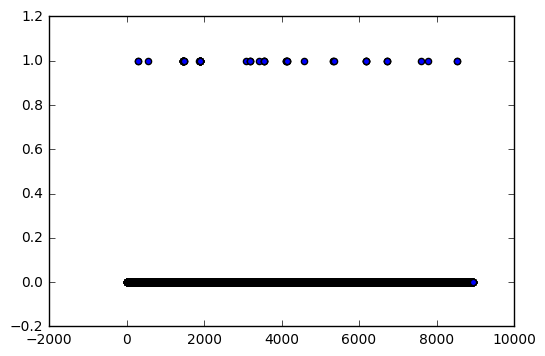

In [93]:
def PredictSeq(svc, t, x, y, z):
    '''
    Do prediction over the whole sequence
    '''
    chunk = 50
    
    signal = np.zeros(len(x) - 50)
    
    for head in range(0, len(x) - 50):
        tmp = range(head, head + chunk)
        tmp1 = numpy.concatenate((normalize(x[tmp]), normalize(y[tmp]), normalize(z[tmp])))
        signal[head] = svc.predict(tmp1.reshape(1, -1))
        #print(head, signal[head])
    plt.scatter(range(len(signal)), signal)
    return(signal)
t, x, y, z, label, filename, duration = Sampling(label=0, order=190)
print(filename)
#print(len(t), len(x), len(y))
plot_data(t, x, y, z)
signal = PredictSeq(svc, t, x, y, z)
print(t[np.where(signal == 1)] - t[0])
#print(signal[duration - 30:duration])

In [76]:
n = len(glob.glob('../../minidata/shake_table/*'))
print(n)
features = np.zeros((192,1))
window = 25

for (i,f) in enumerate(glob.glob('../../minidata/shake_table/*')):
    dd = json.load(open(f, 'rb'))
    t, x, y, z, duration = get_data(dd)
    duration = NaiveTrigger(x, y, z)
    if duration > window and duration + window < len(t):
        tmp = range(duration - window, duration + window)
        tmp1 = numpy.concatenate((normalize(x[tmp]), normalize(y[tmp]), normalize(z[tmp])))
    features[i,0] = svc.predict(tmp1.reshape(1, -1))

n = len(glob.glob('../../minidata/human/*'))
print(n)
features1 = np.zeros((n,1))
for (i,f) in enumerate(glob.glob('../../minidata/human/*')):
    dd = json.load(open(f, 'rb'))
    t, x, y, z, duration = get_data(dd)
    if duration > window and duration + window < len(t):
        tmp = range(duration - window, duration + window)
        tmp1 = numpy.concatenate((normalize(x[tmp]), normalize(y[tmp]), normalize(z[tmp])))
        features1[i,0] = svc.predict(tmp1.reshape(1, -1))
print(np.where(features[:,0] != 1), np.where(features1[:,0] != 0))

192
613
((array([20]),), (array([], dtype=int64),))
